In [74]:
from pandas_datareader import data
import datetime

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 12, 1 )

sp500 = data.DataReader("^GSPC", 'yahoo', start, end)

sp500.loc[:, 'avg_price'] = (sp500.loc[:, 'High'] + sp500.loc[:, 'Low'] + sp500.loc[:, 'Close'])/3

sp500.head()

,Open,High,Low,Close,Volume,Adj Close,avg_price
Date,,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,4304880000,2012.660034,2013.513346
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,3706620000,2016.709961,2014.273315
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,4336660000,1990.260010,1993.673340
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,5076590000,1943.089966,1955.746623
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,4664940000,1922.030029,1933.630005


In [75]:
import pandas as pd

it_stock = pd.read_csv('/Users/Maxwell/PycharmProjects/Github/FinancialProgramClass/companylist_it.csv').loc[:, 'Symbol']
bank_stock = pd.read_csv('/Users/Maxwell/PycharmProjects/Github/FinancialProgramClass/companylist_bank.csv').loc[:, 'Symbol']

stock = {}

for ticker in it_stock:
    
    df_temp = data.DataReader(ticker, 'yahoo', start, end)
    df_temp.loc[:, 'Ticker'] = str(ticker)
    df_temp.loc[:, 'Industry'] = 'IT'
    df_temp.loc[:, 'avg_price'] = (df_temp.loc[:, 'High'] + df_temp.loc[:, 'Low'] + df_temp.loc[:, 'Close'])/3
    stock[ticker] = df_temp

for ticker in bank_stock:
    
    df_temp = data.DataReader(ticker, 'yahoo', start, end)
    df_temp.loc[:, 'Ticker'] = str(ticker)
    df_temp.loc[:, 'Industry'] = 'Bank'
    df_temp.loc[:, 'avg_price'] = (df_temp.loc[:, 'High'] + df_temp.loc[:, 'Low'] + df_temp.loc[:, 'Close'])/3
    stock[ticker] = df_temp

In [100]:
def arithmetic_return_action(data, k = 30, p = 0.05, t = 0.15):
    '''
    This function will calculate arithmetic return of k days and based on the sum return to determine actions
    
    :param df: stock data
    :param k: number of days
    :param p: cutoff rate
    :param t: sum of the return rate to  a action: buy, hold, or sell
    :return: stock data labeled with actions
    '''

    import numpy as np
    df = data.copy()
    df.loc[:, 'temp_return'] = 0
    df.loc[:, 'sum_return']  = 0
    
    
    for i in range(1, k + 1):
        
        df.loc[:, 'temp_return'] = (df.loc[:, 'avg_price'].shift(-i) - df.loc[:, 'Close']) / df.loc[:, 'Close']
        df.loc[np.fabs(df.temp_return) > p, 'sum_return'] += df.loc[(np.fabs(df.temp_return) > p), 'temp_return']

    
    df.loc[df.sum_return >= t, 'action'] = 'buy'    
    df.loc[(df.sum_return < t) & (df.sum_return > -t), 'action'] = 'hold'  
    df.loc[df.sum_return < -t, 'action'] = 'sell' 
    
    return df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume', 'avg_price', 'sum_return', 'action']]

In [101]:
sp_3m = sp500.loc[:'2016-3-31']

sp_3m_action = arithmetic_return_action(sp_3m)

sp_3m_action.describe()

,Open,High,Low,Close,Volume,avg_price,sum_return
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000
mean,1950.946223,1963.812776,1934.444592,1951.224914,4.558996e+09,1949.827427,0.230294
std,63.782953,60.441632,68.971680,65.220669,7.325942e+08,64.538896,0.599457
min,1833.400024,1847.000000,1810.099976,1829.079956,2.809090e+09,1828.726644,-1.404052
25%,1902.520020,1916.989990,1877.400024,1903.030029,4.078620e+09,1897.716675,0.000000
50%,1937.089966,1950.329956,1920.300049,1939.380005,4.570670e+09,1935.626668,0.000000
75%,2011.709961,2015.939941,1989.680054,2012.660034,5.011540e+09,2012.366658,0.339900
max,2063.770020,2072.209961,2058.270020,2063.949951,6.503140e+09,2064.809977,2.266714


The strategy here is if a signal is buy, then we will buy 100 shares at the avg price each time, if signal is sell, we will sell the 100 shares at avg price each time. Based on above 3-month statistic data, the distribution is negative skewed, we set the cutoff rate as 5% and T value as 15%

In [102]:
money_out = sp_3m_action.loc[sp_3m_action.action == 'buy', 'avg_price'].sum() * 100
money_in = sp_3m_action.loc[sp_3m_action.action == 'sell', 'avg_price'].sum() * 100
position = sp_3m_action.loc[sp_3m_action.action == 'buy', 'action'].count() - sp_3m_action.loc[sp_3m_action.action == 'sell', 'action'].count()

avg_cost = (money_out-money_in)/position/100

print('At the end of March 31, 2016, our portfolio position is: {:d} shares, average price bought/sold is: ${:,.2f}'.format(position*100, avg_cost))

At the end of March 31, 2016, our portfolio position is: 2100 shares, average price bought/sold is: $1,880.40


In [103]:
sp500.loc['2016-4-28']

Open         2.090930e+03
High         2.099300e+03
Low          2.071620e+03
Close        2.075810e+03
Volume       4.309840e+09
Adj Close    2.075810e+03
avg_price    2.082243e+03
Name: 2016-04-28 00:00:00, dtype: float64

In [104]:
profit = (sp500.loc['2016-4-28', 'avg_price'] - avg_cost) * position * 100

print('By the end of April 2016, the portfolio profit is ${:,.2f}'.format(profit))

By the end of April 2016, the portfolio profit is $423,861.84


This model can be so profitable is because that all its action are based on already-known future returns, under this assumption, you can't lose money.
Thus, we will use a machine learning method to do a real prediction.

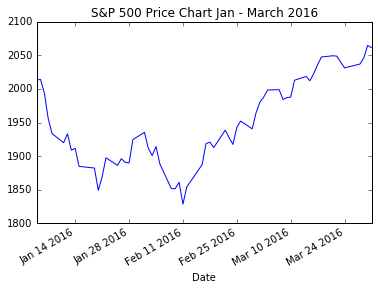

In [97]:
%matplotlib inline
sp_3m.loc[:, 'avg_price'].plot(title="S&P 500 Price Chart Jan - March 2016")

In [107]:
def label_action(data, k = 30, p = 0.05, t = 0.15):
    '''
    This function will calculate arithmetic return of k days and based on the sum return to label actions
    
    :param df: stock data
    :param k: number of days
    :param p: cutoff rate
    :param t: sum of the return rate to label a action: buy, hold, or sell
    :return: stock data labeled with actions
    '''

    import numpy as np
    df = data.copy()
    df.loc[:, 'temp_return'] = 0
    df.loc[:, 'sum_return']  = 0
    
    
    for i in range(1, k + 1):
        
        df.loc[:, 'temp_return'] = (df.loc[:, 'avg_price'].shift(-i) - df.loc[:, 'Close']) / df.loc[:, 'Close']
        df.loc[np.fabs(df.temp_return) > p, 'sum_return'] += df.loc[(np.fabs(df.temp_return) > p), 'temp_return']

    
    df.loc[df.sum_return >= t, 'action'] = 'buy'    
    df.loc[(df.sum_return < t) & (df.sum_return > -t), 'action'] = 'hold'  
    df.loc[df.sum_return < -t, 'action'] = 'sell' 
    
    return df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume', 'avg_price', 'sum_return', 'action']]

In [121]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df = label_action(sp500)

df.loc[:, 'action'] = label.fit_transform(df.loc[:, 'action'].astype(str))

df = df.loc[:'2016-10-31']

,Open,High,Low,Close,Volume,avg_price,action
Date,,,,,,,
2016-10-26,2136.969971,2145.729980,2131.590088,2139.429932,3775200000,2138.916667,1
2016-10-27,2144.060059,2147.129883,2132.520020,2133.040039,4204830000,2137.563314,1
2016-10-28,2132.229980,2140.719971,2119.360107,2126.409912,4019510000,2128.829997,1
2016-10-31,2129.780029,2133.250000,2125.530029,2126.149902,3922400000,2128.309977,1
2016-11-01,2128.679932,2131.449951,2097.850098,2111.719971,4532160000,2113.673340,1


In [126]:
from sklearn import ensemble
X_train = df.loc[:'2016-07-31',['Open', 'High', 'Low', 'Close', 'Volume', 'avg_price']]
y_train = df.loc[:'2016-07-31','action']
X_test = df.loc['2016-08-01':,['Open', 'High', 'Low', 'Close', 'Volume', 'avg_price']]

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)